# A first look at the Gaia DR2 data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
%matplotlib inline 

root_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
data_dir = os.path.abspath(os.path.join(root_dir, '..', 'data'))

print(data_dir)

/Users/jfwu/projects/gaia-dr2/data


In [2]:
!ls -lh /Users/jfwu/projects/gaia-dr2/data

total 9049984
-rw-r--r--  1 jfwu  staff   991M May  2 13:33 GaiaSource_1584380076484244352_2200921635402776448.csv
-rw-r--r--  1 jfwu  staff   987M May  2 13:35 GaiaSource_2200921875920933120_3650804325670415744.csv
-rw-r--r--  1 jfwu  staff   986M May  2 13:36 GaiaSource_2851858288640_1584379458008952960.csv
-rw-r--r--  1 jfwu  staff   981M May  2 13:38 GaiaSource_3650805523966057472_4475721411269270528.csv
-rw-r--r--  1 jfwu  staff   990M May  2 13:40 GaiaSource_4475722064104327936_5502601461277677696.csv
-rw-r--r--  1 jfwu  staff   990M May  2 14:10 GaiaSource_5502601873595430784_5933051501826387072.csv
-rw-r--r--  1 jfwu  staff   986M May  2 14:11 GaiaSource_5933051914143228928_6714230117939284352.csv
-rw-r--r--  1 jfwu  staff   220M May  2 14:12 GaiaSource_6714230465835878784_6917528443525529728.csv
-rw-r--r--  1 jfwu  staff   133B May  2 13:37 README
-rw-r--r--  1 jfwu  staff   853M May  9 11:34 first_million_random_index.csv
-rw-r--r--  1 jfwu  staff   854M May  9 12:20 second_m

### Read first CSV file into a Pandas DataFrame
This takes ~30 seconds and uses ~1 GB of memory.

In [3]:
df = pd.read_csv(os.path.join(data_dir, 'GaiaSource_2851858288640_1584379458008952960.csv'))

In [4]:
df.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper
0,1635721458409799680,Gaia DR2 2851858288640,2851858288640,710827874,2015.5,45.132144,0.051487,0.137851,0.039624,2.618833,...,0.0485,0.0154,0.1405,200111,1.062855,1.038464,1.090551,1.223455,1.187251,1.259659
1,1635721458409799680,Gaia DR2 3332894779520,3332894779520,1512134789,2015.5,45.058167,0.037937,0.127404,0.038226,1.742291,...,NaN,NaN,NaN,200111,2.423673,2.367469,2.469946,2.798626,2.689419,2.907832
2,1635721458409799680,Gaia DR2 7632157690368,7632157690368,830339102,2015.5,45.034337,0.053568,0.235391,0.037913,5.692796,...,NaN,NaN,NaN,200111,5.345316,5.201734,5.452383,15.383204,15.173032,15.593377
3,1635721458409799680,Gaia DR2 9281425163264,9281425163264,1074475725,2015.5,45.165008,0.045778,0.200060,0.040007,3.750882,...,NaN,NaN,NaN,200111,1.674627,1.288279,1.786101,2.922812,2.860702,2.984922
4,1635721458409799680,Gaia DR2 12545600306304,12545600306304,614396172,2015.5,45.234476,0.034646,0.318159,0.033514,4.257022,...,0.1240,0.0450,0.2015,200111,0.976732,0.930710,1.013032,0.584591,0.575970,0.593211


That is a ton of columns. Let's figure out which ones we care about.

In [5]:
df.columns.tolist()

['solution_id',
 'designation',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'astrometric_weight_al',
 'astrometric_pseudo_colour',
 'astrometric_pseudo_colour_error',
 'mean_varpi_factor_al',
 'astrometric_matched_observations',
 'visibility_periods_used',
 'astrometric_sigma5d_max',
 'frame_rotator_object_type',
 'matched_observations',
 'duplicated_source',
 'phot_g_n_ob

Let's try to get high parallax signal-to-noise ratio objects...

/Users/jfwu/anaconda3/envs/gaia-hack/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/Users/jfwu/anaconda3/envs/gaia-hack/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jfwu/anaconda3/envs/gaia-hack/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


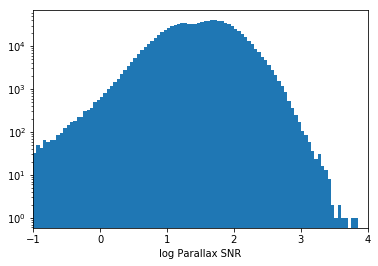

In [6]:
parallax_SNR = df.parallax_over_error

# notna() is a command that selects those that are not N/A (or NaN or in this case, not floats)
plt.hist(np.log10(parallax_SNR[parallax_SNR.notna()]), bins=100, range=[-1, 4])
plt.yscale('log')
plt.xlim(-1, 4)
plt.xlabel('log Parallax SNR')
plt.show()

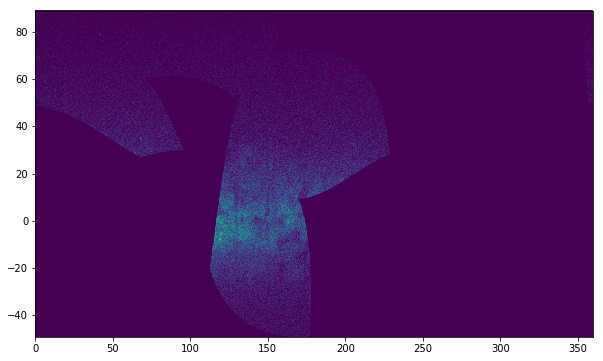

In [7]:
plt.figure(figsize=(10, 6))
plt.hist2d(df.l, df.b, bins=1000)
plt.show()

### Okay, so we're not going to use this because it's not a representative sample... Instead, let's use the `random_index` column to generate a random sample.

In [8]:
df = pd.read_csv(os.path.join(data_dir, 'first_million_random_index.csv'))

/Users/jfwu/anaconda3/envs/gaia-hack/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url
0,1635721458409799680,Gaia DR2 4205572950572486656,4205572950572486656,0,2015.5,284.997397,0.320213,-7.213794,0.250722,0.336854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
1,1635721458409799680,Gaia DR2 4205565597589384320,4205565597589384320,1,2015.5,285.403309,0.107384,-7.148584,0.102720,0.245811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
2,1635721458409799680,Gaia DR2 4053206649305182080,4053206649305182080,2,2015.5,275.626769,0.910609,-25.133812,0.668263,1.052592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
3,1635721458409799680,Gaia DR2 4205568964799943680,4205568964799943680,3,2015.5,285.346380,1.255121,-7.110390,1.028153,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
4,1635721458409799680,Gaia DR2 4049398731303340416,4049398731303340416,4,2015.5,274.009409,0.349221,-30.525125,0.348200,0.259290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN


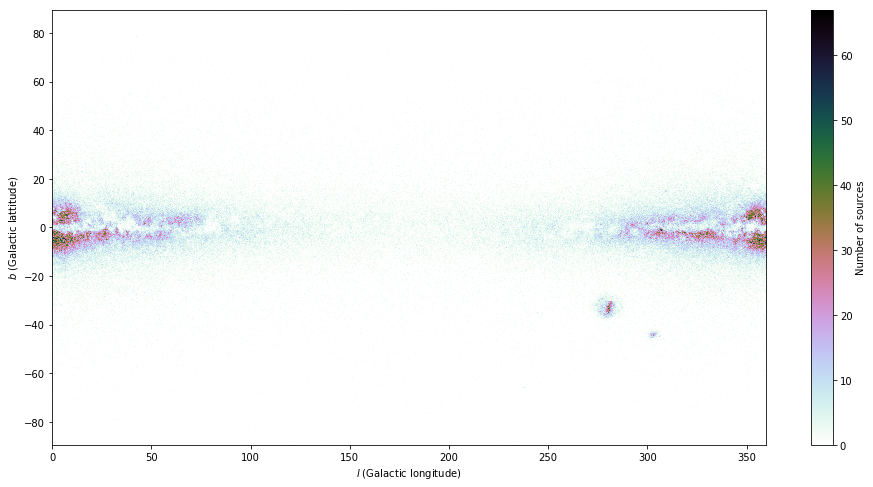

In [12]:
plt.figure(figsize=(16, 8))
plt.hist2d(df.l, df.b, bins=1000, cmap=plt.cm.cubehelix_r)
cbar = plt.colorbar()
cbar.set_label('Number of sources')
plt.xlabel('$l$ (Galactic longitude)')
plt.ylabel('$b$ (Galactic lattitude)')
plt.show()

### Plotting position vs radial velocity 

/Users/jfwu/anaconda3/envs/gaia-hack/lib/python3.6/site-packages/matplotlib/projections/geo.py:485: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


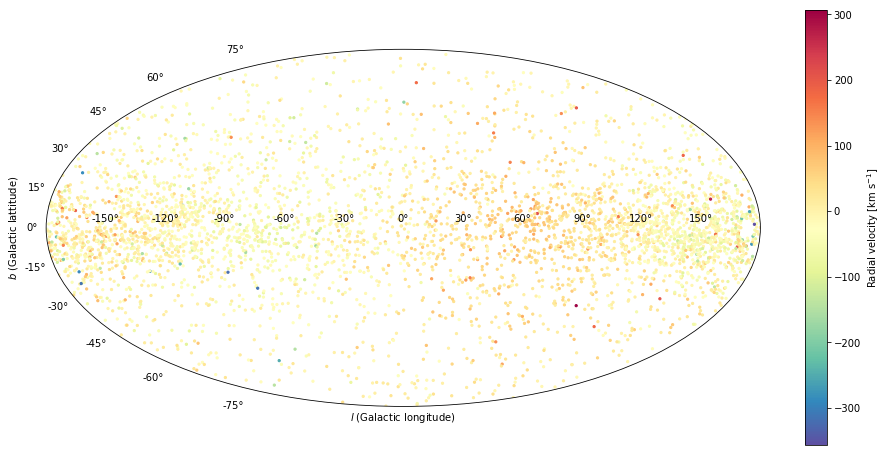

In [19]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='mollweide')

im = ax.scatter(np.deg2rad(df.l - 180), np.deg2rad(df.b), c=df.radial_velocity, cmap=plt.cm.Spectral_r, s=5.)
cbar = plt.colorbar(im)
cbar.set_label('Radial velocity [km s$^{-1}$]')
ax.set_xlabel('$l$ (Galactic longitude)')
ax.set_ylabel('$b$ (Galactic lattitude)')
plt.show()

In [20]:
print('The number of objects with radial velocities in the first million Gaia sources = {}.'.format(sum(df.radial_velocity.notna())))

The number of objects with radial velocities in the first million Gaia sources = 4212.


### Applying a parallax signal to noise ratio cut

/Users/jfwu/anaconda3/envs/gaia-hack/lib/python3.6/site-packages/matplotlib/projections/geo.py:485: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


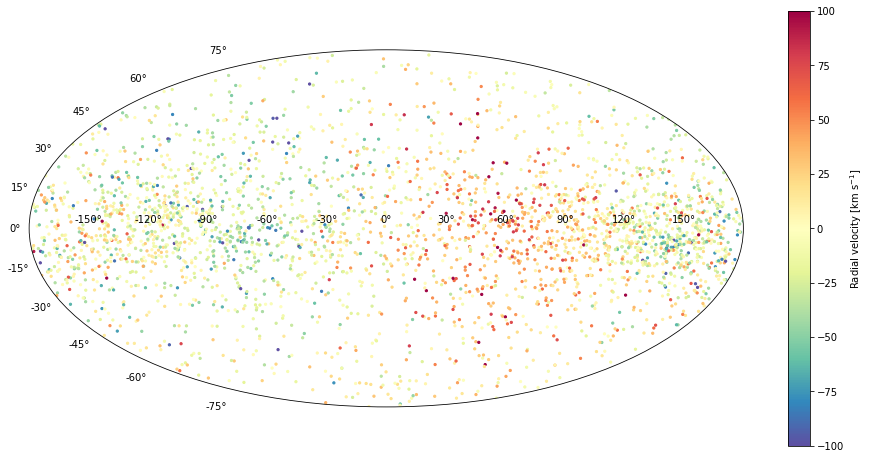

In [22]:
parallax_cut = df.parallax_over_error > 10

df_cut = df[parallax_cut]

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='mollweide')

im = ax.scatter(np.deg2rad(df_cut.l - 180), np.deg2rad(df_cut.b), c=df_cut.radial_velocity, 
                cmap=plt.cm.Spectral_r, s=5., vmin=-100, vmax=100)
cbar = plt.colorbar(im)
cbar.set_label('Radial velocity [km s$^{-1}$]')

plt.show()